<a href="https://colab.research.google.com/github/intuition-explorer/ML-Algorithms/blob/main/SMS_Spam_RFor%2BGradBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

import pandas as pd
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'text']) #remove their header, add columns=names to data
print(data.head())

Saving SMSSpamCollection to SMSSpamCollection
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
#Simple example
message = data['text'][0]  # get first message
print(message)

tokens = message.split()  # split on spaces by default
print(tokens)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [3]:
import re  #regular expression module re.sub(pattern, replacement, text)
def tokenizer(text):
  text = text.lower()
  text = re.sub(r'[^a-z0-9\s]', ' ', text)  # r=replace anything thats not=^, such as a-z or 0-9 or /s=whitespace, applied to input text
  #brackets were getting erased and merging words so ill replace '' with ' '
  tokens = text.split()
  return tokens

test = data['text'][1]
print(test)
tokenizer(test)
print(tokenizer(test))
#now that ive defined function tokenizer need to apply it to a for loop
print(len(data))
data.shape

Ok lar... Joking wif u oni...
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
5572


(5572, 2)

In [4]:
'''  I initially had for text in data['text'] into split = tokenizer(text) that gave me a huge list, this variation below was really slow

for text in data['text']:
 for i in range(len(data)): #len(data) is all the rows, data.shape=(5572,2)
  text = data['text'][i] #this should give me 1 row at a time
  split = tokenizer(text)
  print(split)
  '''

"  I initially had for text in data['text'] into split = tokenizer(text) that gave me a huge list, this variation below was really slow\n\nfor text in data['text']:\n for i in range(len(data)): #len(data) is all the rows, data.shape=(5572,2)\n  text = data['text'][i] #this should give me 1 row at a time\n  split = tokenizer(text)\n  print(split)\n  "

In [5]:
# Loop through the first 5 rows only (spot check)
for i in range(5):
    original_text = data['text'][i]           # get row i from data text
    tokens = tokenizer(original_text)         # tokenize it
    print(f"Original: {original_text}")       # show raw
    print(f"Tokens:   {tokens}")               # show cleaned tokens
    print("-" * 40)                            # separator for readability
#If i wanted to tokenize everything i was doing it in loop row by row, but dataframe vectorizes as a column way more efficient using .apply()****

Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Tokens:   ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
----------------------------------------
Original: Ok lar... Joking wif u oni...
Tokens:   ['ok', 'lar', 'joking', 'wif', 'u', 'oni']
----------------------------------------
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Tokens:   ['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']
----------------------------------------
Original: U dun say so early hor... U c already then say.

In [6]:
#pandas has .sample(n= ...) this gives you n random rows, need to set random state as well
# Get 5 random rows
sampled_rows = data.sample(n=5, random_state=42)  # random_state, otherwise random new rows everytime its run

# Loop through them
for idx, row in sampled_rows.iterrows(): # if do for i in get columns, it's a data frame so need idx=col and row=row
    #iterrows() tells pandas to go row over row and return both index and row; this is like a mini dictionariy
    original_text = row['text']
    tokens = tokenizer(original_text)
    print(f"Original: {original_text}")
    print(f"Tokens:   {tokens}")
    print("-" * 40)

Original: Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
Tokens:   ['squeeeeeze', 'this', 'is', 'christmas', 'hug', 'if', 'u', 'lik', 'my', 'frndshp', 'den', 'hug', 'me', 'back', 'if', 'u', 'get', '3', 'u', 'r', 'cute', '6', 'u', 'r', 'luvd', '9', 'u', 'r', 'so', 'lucky', 'none', 'people', 'hate', 'u']
----------------------------------------
Original: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Tokens:   ['and', 'also', 'i', 've', 'sorta', 'blown', 'him', 'off', 'a', 'couple', 'times', 'recently', 'so', 'id', 'rather', 'not', 'text', 'him', 'out', 'of', 'the', 'blue', 'looking', 'for', 'weed']
----------------------------------------
Original: Mmm thats better now i got a roast down me! id b better if i had a few drinks down me 2! Good indian?
Tokens:   ['mmm', 'thats', 'better', 'now', 'i', 'got', 'a', 'roast', 

In [7]:
#This would be more natural for me
# Take 5 random rows
sampled_rows = data.sample(n=5, random_state=42)

# Loop by position
for i in range(len(sampled_rows)):#len here is number of rows
    original_text = sampled_rows.iloc[i]['text']  # grab the 'text' at position i. #iloc is integerlocation=index
    tokens = tokenizer(original_text)
    print(f"Original: {original_text}")
    print(f"Tokens:   {tokens}")
    print("-" * 40)

Original: Squeeeeeze!! This is christmas hug.. If u lik my frndshp den hug me back.. If u get 3 u r cute:) 6 u r luvd:* 9 u r so lucky;) None? People hate u:
Tokens:   ['squeeeeeze', 'this', 'is', 'christmas', 'hug', 'if', 'u', 'lik', 'my', 'frndshp', 'den', 'hug', 'me', 'back', 'if', 'u', 'get', '3', 'u', 'r', 'cute', '6', 'u', 'r', 'luvd', '9', 'u', 'r', 'so', 'lucky', 'none', 'people', 'hate', 'u']
----------------------------------------
Original: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
Tokens:   ['and', 'also', 'i', 've', 'sorta', 'blown', 'him', 'off', 'a', 'couple', 'times', 'recently', 'so', 'id', 'rather', 'not', 'text', 'him', 'out', 'of', 'the', 'blue', 'looking', 'for', 'weed']
----------------------------------------
Original: Mmm thats better now i got a roast down me! id b better if i had a few drinks down me 2! Good indian?
Tokens:   ['mmm', 'thats', 'better', 'now', 'i', 'got', 'a', 'roast', 

In [8]:
#in text column apply tokenizer function to the entire column to make a new column called tokens | Here data[text] is a Series, presevers index
data['tokens'] = data['text'].apply(tokenizer)
print(data.head())

  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, don, t, think, he, goes, to, usf, he,...  


In [9]:
#.copy() ensures new objects are independent so im not distoring original data
y = data['label'].copy() #target
print(y.head())
'''
X = data['tokens'].copy() #features
print(X.head())
#alternatively could do X = data.drop('label', axis=1) axis=1 means drop column, without by defualt it assumes axis=0 and will try to drop a row
'''

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object


"\nX = data['tokens'].copy() #features\nprint(X.head())\n#alternatively could do X = data.drop('label', axis=1) axis=1 means drop column, without by defualt it assumes axis=0 and will try to drop a row\n"

In [10]:
#Need to build a dict to map each unique token to a number, then vectorize each message that counts how many times a word appears

In [11]:
print(data.head())

  label                                               text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, 2, a, wkly, comp, to, win, f...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, don, t, think, he, goes, to, usf, he,...  


In [12]:
all_tokens = [] #initialize empty list
for tokens_list in data['tokens']: #here for tokens_list, is a row in the data[tokens] column/seres, id rename
    for token in tokens_list: #then get all specific tokens from the row
        all_tokens.append(token) #add tokens to original list
print(all_tokens[:10])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n']


In [13]:
# quick check: what types live in the column?
data['tokens'].apply(type).value_counts() #.apply acts on the entire column, type is inbuilt for within series, value_counts() gives number of unique val=rows

,count
tokens,
<class 'list'>,5572


In [14]:
from collections import Counter #counter is dict subclass from module
token_counts = Counter(all_tokens) #key=unique token and value=number of repeats
token_counts.most_common(20) #most_common(n) returns n most frequent items as a list of (token,count) tuples from dictionary
#auto sorted from most frequent to least

[('i', 3021),
 ('to', 2253),
 ('you', 2245),
 ('a', 1450),
 ('the', 1339),
 ('u', 1207),
 ('and', 980),
 ('in', 903),
 ('is', 897),
 ('me', 807),
 ('my', 766),
 ('it', 752),
 ('for', 711),
 ('your', 681),
 ('of', 623),
 ('call', 593),
 ('that', 586),
 ('s', 580),
 ('have', 578),
 ('on', 538)]

In [15]:
vocab = []
count_vocab = []
for token_count in token_counts.most_common():
  token = token_count[0]
  count = token_count[1]
  vocab.append(token)
  count_vocab.append(count)
print(count_vocab[:10])
print(vocab[:10])
print(len(vocab)) #unique number of tokens

[3021, 2253, 2245, 1450, 1339, 1207, 980, 903, 897, 807]
['i', 'to', 'you', 'a', 'the', 'u', 'and', 'in', 'is', 'me']
8745


In [16]:
#Make a dictionary using list of tokens to create an index of basis vectors
token2idx = {}

for idx, token in enumerate(vocab): #I need to specify idx and token as key and value in dictionary, enumerate is built in fxn it adds counter as key for my list
  token2idx[token] = idx # 0 index maps to vocab[0] and adds it
print(token2idx)

{'i': 0, 'to': 1, 'you': 2, 'a': 3, 'the': 4, 'u': 5, 'and': 6, 'in': 7, 'is': 8, 'me': 9, 'my': 10, 'it': 11, 'for': 12, 'your': 13, 'of': 14, 'call': 15, 'that': 16, 's': 17, 'have': 18, 'on': 19, '2': 20, 'now': 21, 'are': 22, 't': 23, 'can': 24, 'so': 25, 'but': 26, 'not': 27, 'm': 28, 'or': 29, 'do': 30, 'we': 31, 'at': 32, 'ur': 33, 'get': 34, 'will': 35, 'if': 36, 'be': 37, 'with': 38, 'just': 39, 'no': 40, 'this': 41, '4': 42, 'gt': 43, 'lt': 44, 'how': 45, 'up': 46, 'when': 47, 'ok': 48, 'what': 49, 'free': 50, 'from': 51, 'go': 52, 'all': 53, 'out': 54, 'll': 55, 'know': 56, 'like': 57, 'good': 58, 'then': 59, 'got': 60, 'there': 61, 'day': 62, 'come': 63, 'he': 64, 'was': 65, 'its': 66, 'am': 67, 'time': 68, 'only': 69, 'love': 70, 'send': 71, 'want': 72, 'text': 73, 'as': 74, 'txt': 75, 'one': 76, '1': 77, 'by': 78, 'going': 79, 'don': 80, 'need': 81, 'home': 82, 'she': 83, 'about': 84, 'r': 85, 'lor': 86, 'today': 87, 'sorry': 88, 'stop': 89, 'see': 90, 'still': 91, 'n': 9

In [17]:
#Each token is going to be a basis vector so im constructing an 8745 space
import numpy as np

def vectorize_sentence(sentence_tokens, token2idx):
    # Initialize a zero vector of length equal to vocab size
    vec = np.zeros(len(token2idx), dtype=int) # produces 0s of vector space size, set as int (not float or anything else)
    for token in sentence_tokens: #loop over token in each sentence
      if token in token2idx: #check if token in dictionary
        idx = token2idx[token] #find index for this token (basis vector on axis)
        vec[idx] +=1 #Increment the count at this position, goes from 000 to 010 e.g. per token
    return vec

In [18]:
row_index= len(data) -1
tokens = data['tokens'].iloc[row_index]

vec = vectorize_sentence(tokens, token2idx)
print(vec)


[0 1 0 ... 0 0 0]


In [19]:
import numpy as np

# Initialize an empty list to store vectors
all_vectors = []

# Loop over each row index in the DataFrame
for i in range(len(data)):
    # Get the token list for this row
    tokens = data['tokens'].iloc[i]

    # Vectorize this token list using the function you have
    vec = vectorize_sentence(tokens, token2idx)

    # Append the vector to the list
    all_vectors.append(vec)

# Convert list of vectors into a 2D NumPy array (rows = messages, cols = vocab size)
X = np.array(all_vectors)

print(X.shape)  # should be (number of messages, vocabulary size)
print(all_vectors[0])

(5572, 8745)
[0 0 0 ... 0 0 0]


In [20]:
print("Shape of X:", X.shape)
print("Data type of X:", X.dtype)
print("First row of X:\n", X[0])
print("Sum of first row (total tokens in first message):", X[0].sum())
print("Number of non-zero entries in first row:", (X[0] != 0).sum())
print("Max value in X (should be >=1):", X.max())


Shape of X: (5572, 8745)
Data type of X: int64
First row of X:
 [0 0 0 ... 0 0 0]
Sum of first row (total tokens in first message): 20
Number of non-zero entries in first row: 20
Max value in X (should be >=1): 18


In [21]:
print("Shape of y:", y.shape)
print("Unique labels in y:", y.unique())
print("Counts of each label:\n", y.value_counts())
y.dtype#this is object because series with strings in it
y_num = y.map({'ham': 0, 'spam': 1})
print("Shape of y:", y_num.shape)
print("Unique labels in y:", y_num.unique())
print("Counts of each", y_num.value_counts())

Shape of y: (5572,)
Unique labels in y: ['ham' 'spam']
Counts of each label:
 label
ham     4825
spam     747
Name: count, dtype: int64
Shape of y: (5572,)
Unique labels in y: [0 1]
Counts of each label
0    4825
1     747
Name: count, dtype: int64


In [22]:
#Grad Boosting is ensemble of weak learners here decision tree that is shallow, each small model focuses on error of previous model to boost performance
#RandForest is bagging/parallel indep learners that take majority vote/average, lower overfitting risk due to randomness, easier to tune
#GradBoost is sequential, each learner fixes errors w. additive updates, needs regularizaiton as high risk of overfitting, usually better without tuning

In [23]:
#from sklearn.preprocessing import StandardScaler dont need bc features are vector frequencies and decision trees are scale invariant
from sklearn.model_selection import train_test_split

# First split: Train vs Temp (Validation + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_num, test_size=0.3, random_state=42, stratify=y_num
)

# Second split: Validation vs Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print shapes for sanity check
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

X_train: (3900, 8745)
X_val: (836, 8745)
X_test: (836, 8745)


In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
#using accuracy, precision, recall and F1 score-confusion matrix
def evaluate(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    #average because binary classification, zerodivision avoids crashes if class not predicted
    precision, recall, f1, _ = precision_recall_fscore_support( #here ,_ is a throwaway variable as it'll return support:true count doenst help with DT
        y_true, y_pred, average='binary', zero_division=0
    )
    print(f"accuracy={acc:.4f}, precision={precision:.4f}, recall={recall:.4f}, f1={f1:.4f}")


In [25]:
'''
#Import Decision Tree from Previous code or use sciKit Learn
import numpy as np
import pandas as pd

# ----------------------
# Gini impurity function
# ----------------------
def gini_impurity(y):
    """
    Compute Gini impurity for a binary label array y.
    Returns 0 if y is empty.
    """
    if len(y) == 0:
        return 0
    p1 = np.mean(y)        # proportion of class 1
    p0 = 1 - p1            # proportion of class 0
    return 1 - p0**2 - p1**2  # Gini formula

# ----------------------
# Split dataset function
# ----------------------
def split_dataset(X, y, feature, threshold):
    """
    Split X and y based on a feature threshold.
    Returns X_left, y_left, X_right, y_right.
    """
    # Align y index to X index
    y = pd.Series(y.values, index=X.index)

    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold

    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]
# ----------------------
# Best split function
# ----------------------
def best_split(X, y):
    """
    Find the best feature and threshold to split the dataset.
    Returns: best_feature, best_threshold, best_splits (X_left, y_left, X_right, y_right)
    """
    best_feature = None
    best_threshold = None
    best_gini = float('inf')
    best_splits = None

    n_samples, n_features = X.shape

    for feature_idx in range(n_features):
        feature_name = X.columns[feature_idx]
        values = X[feature_name].unique()  # candidate thresholds

        for threshold in values:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_name, threshold)

            gini_left = gini_impurity(y_left)
            gini_right = gini_impurity(y_right)

            n_left = len(y_left)
            n_right = len(y_right)
            weighted_gini = (n_left / n_samples) * gini_left + (n_right / n_samples) * gini_right

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature_name
                best_threshold = threshold
                best_splits = (X_left, y_left, X_right, y_right)

    return best_feature, best_threshold, best_splits

# ----------------------
# TreeNode class
# ----------------------
class TreeNode:
    """
    Node in the decision tree.
    """
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature      # feature used for split
        self.threshold = threshold  # threshold for split
        self.left = left            # left child TreeNode
        self.right = right          # right child TreeNode
        self.value = value          # class label if leaf node

    def is_leaf(self):
        return self.value is not None
'''

'\n#Import Decision Tree from Previous code or use sciKit Learn\nimport numpy as np\nimport pandas as pd\n\n# ----------------------\n# Gini impurity function\n# ----------------------\ndef gini_impurity(y):\n    """\n    Compute Gini impurity for a binary label array y.\n    Returns 0 if y is empty.\n    """\n    if len(y) == 0:\n        return 0\n    p1 = np.mean(y)        # proportion of class 1\n    p0 = 1 - p1            # proportion of class 0\n    return 1 - p0**2 - p1**2  # Gini formula\n\n# ----------------------\n# Split dataset function\n# ----------------------\ndef split_dataset(X, y, feature, threshold):\n    """\n    Split X and y based on a feature threshold.\n    Returns X_left, y_left, X_right, y_right.\n    """\n    # Align y index to X index\n    y = pd.Series(y.values, index=X.index)\n\n    left_mask = X[feature] <= threshold\n    right_mask = X[feature] > threshold\n\n    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]\n# ----------------------\n# 

In [26]:
from sklearn.tree import DecisionTreeClassifier
#help(DecisionTreeClassifier)

rtree = DecisionTreeClassifier(criterion= 'gini',
                      max_depth= 12, #I could do none random forest wants deep but dont want to memorize samples so ill do 10-12
                      min_samples_split=2, #node split too high will underfit wont split, too low deep tree can overfit but random forest mitigates taht
                      min_samples_leaf=2, # num of samples required to split node, depends on size of dataset small=2 large =10
                      max_features='sqrt', #this is num of features to consider each split, bc our vec is 1000s make it small to decorrelate/generalize
                      random_state=22,
                                )

In [27]:
#initialize random tree class
import numpy as np

#Define class, has parameters in the init function, these are temporary names with default values
class RandomForest:
    def __init__( #this is a function: initialize
        self, #object instance
        n_trees=10,           # how many trees in the forest
        max_depth=None,       # max depth per tree
        min_samples_split=2,  # minimum samples to split a node
        min_samples_leaf=1,   # minimum samples in a leaf
        max_features='sqrt',  # features considered per split
        random_state=None     # reproducibility
    ):

#instances of the variables vs function parameters in brackets above, temp names then attached to values below
        self.n_trees = n_trees #self. takes the value of the parameter (here 10) and stores it as instance var(LH), stored inside rf later when rf=RandClass()
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        #without these if i do rf(n_trees=50)I'll get an error as it can't access n_trees without self

#creates new list object in memory
#creates reference inside self called trees (so this becomes part of the obj rf)
#So just like above this object is stored in rf called trees, but here it's an empty list
        self.trees = []  #stores all DTrees, mutable list unlike above

        if random_state is not None: #random here is selecting bootstrapping samples for each tree in the forest
            np.random.seed(random_state)  # ensure reproducible bootstraps

#rf=RandomForest() rf is isntance, self inside class refers to that same object while _init_ is running, every attribute self becomes part of obj

In [28]:
X.shape[0]

5572

In [29]:
#Randomly pick rows from dataset with replacement (same row can pick again), each tree is trained on bootstrap not the entire dataset (does this mean mult rows)
#Reduces variance by averaging, as individual trees can overfit. Here each tree sees slightly diff data, improves ensemble performance
#Bagging=sample with repalcement
def _bootstrap_sample(self, X, y): #self allows method to access isntance variables if needed e.g. self.random_state
      n_samples = X.shape[0] #number of rows/samples
      indices = np.random.choice(n_samples, size=n_samples, replace=True) #randomly pick indices from 0 to n-1, allow repeats, indices create samples
#size=n_samples so same as original dataset, but some rows will repeat and therefore some others will be missing
      return X.iloc[indices], y.iloc[indices] #X and y samples here b.c df cant just say X[indices]


In [30]:
 #Fit, we are going to train n decision trees on bootstrap samples and store them as self.trees
def fit(self, X, y): # Add self here
  for _ in range(self.n_trees):  # loop over number of trees, here _ b/c we dont care about loop index, loops once for each tree and self.n_trees defined in class
        # Step 1: create bootstrap sample-here we're running the previous method it creates a 'unique' dataset
        X_sample, y_sample = self._bootstrap_sample(X, y) #calls bootstrap method inside the object (self) or rf in this case when rf=RandomForest()
#without .self itlook for a function vs the method that it is, defined on RandFor Class

        # Step 2: create a new decision tree, for every iteration so it's not all stored in one and overwritten
        tree = DecisionTreeClassifier(
            criterion='gini',
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf,
            max_features=self.max_features,
            random_state=self.random_state  # optional: can also vary per tree for more randomness
        )

        # Step 3: fit the tree on the bootstrap sample, the repeat but b/c new sample new tree (stil lsimilar)
        tree.fit(X_sample, y_sample)

        # Step 4: store the trained tree in self.trees
        self.trees.append(tree)

In [31]:
#With a trained tree on a bootstrap sample, when a row is applied to a tree it'll make a prediction and can vary amongst trees
def predict(self, X): #self refers to the random forest instance calling the method rf
        """
        Predict by aggregating predictions of all trees (majority vote).
        """
        all_preds = []

        # 1. Get predictions from every tree
        for tree in self.trees:
            preds = tree.predict(X) #this is a method from scikit learn due to import
            all_preds.append(preds) #stores all predictions as an array

        # 2. Convert to 2D array: shape (n_trees, n_samples)
        all_preds = np.array(all_preds)

        # 3. Take majority vote for each sample
        y_pred = []
        for i in range(all_preds.shape[1]): #loops over column which is predictions of all trees (rows) on a specific row of X
            counts = np.bincount(all_preds[:, i])
            y_pred.append(np.argmax(counts))

        return np.array(y_pred)


In [32]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class RandomForest:
    def __init__(self,
                 n_trees=10,
                 criterion='gini',
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 max_features='sqrt',
                 random_state=None):
        """
        Custom Random Forest classifier using sklearn DecisionTreeClassifier as base.
        """
        self.n_trees = n_trees
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def _bootstrap_sample(self, X, y):
        """
        Generate a bootstrap sample using integer-based NumPy indexing.
        Converts pandas objects to NumPy arrays for safety.
        """
        # Convert pandas to NumPy if needed
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        """
        Train n_trees decision trees on bootstrap samples.
        """
        np.random.seed(self.random_state)
        self.trees = []

        for i in range(self.n_trees):
            X_sample, y_sample = self._bootstrap_sample(X, y)

            tree = DecisionTreeClassifier(
                criterion=self.criterion,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                max_features=self.max_features,
                random_state=self.random_state
            )

            # Cast X_sample to float64 for safety
            tree.fit(X_sample.astype(np.float64), y_sample)
            self.trees.append(tree)

    def predict(self, X):
        """
        Predict class labels for samples in X using majority vote.
        """
        # Convert pandas to NumPy if needed
        if hasattr(X, 'values'):
            X = X.values

        all_preds = []
        for tree in self.trees:
            preds = tree.predict(X.astype(np.float64))
            all_preds.append(preds)

        all_preds = np.array(all_preds)  # shape: (n_trees, n_samples)

        # Majority vote
        y_pred = []
        for i in range(all_preds.shape[1]):
            counts = np.bincount(all_preds[:, i])
            y_pred.append(np.argmax(counts))

        return np.array(y_pred)
#Bug was putting all these together, and then something about pandas and numpys not playing well together

In [33]:
# Assuming X_train, y_train, X_val, y_val are defined (NumPy arrays or pandas)

rf = RandomForest(
    n_trees=50,
    criterion='gini',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=22
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)


In [34]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Initialize scikit-learn RandomForestClassifier with same hyperparameters
rf_sklearn = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=22,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
rf_sklearn.fit(X_train, y_train)

# Make predictions
y_pred_sklearn = rf_sklearn.predict(X_val)

In [36]:
print(y_pred_sklearn)
# Evaluate
accuracy = accuracy_score(y_val, y_pred_sklearn)
report = classification_report(y_val, y_pred_sklearn)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Predictions:\n", y_pred_sklearn)

accuracysc = accuracy_score(y_val, y_pred)
reportsc = classification_report(y_val, y_pred)

print("Accuracy:", accuracysc)
print("Classification Report:\n", reportsc)


[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [ ]:
#Grad Boosting start: so we have probab of spam over total = F0 serves as original guess this is line a plane through our sample space
#Each axis on sample space is a row, by true y it's either 0 or 1, plane F0 crosses through all axes
#Residual=vector attached to plane, as point on an axis, pointing in direction towards true value

In [70]:
import numpy as np
#F0 as mean of y=Plane cutting through sample space
# SMS labels, 0 = ham, 1 = spam
F0 = np.mean(y_train)  # Initial prediction for all rows
print("F0 (initial guess for all samples):", F0)

#Compute initial residuals (negative gradient)
residuals = y_train - F0
print("Residuals (first 10 rows):", residuals[:10]) #output makes sense for binary 0 1 minus 0.13

F0 (initial guess for all samples): 0.1341025641025641
Residuals (first 10 rows): 4914    0.865897
2541   -0.134103
5323   -0.134103
5171   -0.134103
2532   -0.134103
4085   -0.134103
3420    0.865897
2568   -0.134103
3256   -0.134103
203    -0.134103
Name: label, dtype: float64


In [71]:
print(F0.shape)

()


In [58]:
#F0 is flat manifold, residual vectors are negative gradient of loss at each sample
#weak learners then map regions of feature space as vector fields mapping to adjustments in residual vectors, pointing from manifold to true value
#topology from these cells creaties regions of feature space, mapping them as vector fields in a sample space creates a hilly loss function from F0
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(
    max_depth=1,             # weak learner: shallow tree / stump
    random_state=42,         # reproducibility
    min_samples_split=2,     # prevents splitting tiny samples unnecessarily
    min_samples_leaf=1,      # ensures leaf has at least 1 sample
    max_features=None        # consider all features at each split; can tune later
)
tree1.fit(X_train, residuals)  # fit only on training set

h1=tree1.predict(X_train)
print("Predictions (first 10 rows):", h1[:10])

# Update F1 using learning rate eta
eta = 0.1  # shrinkage/learning rate
F1 = F0 + eta * h1
print("Updated predictions F1 (first 10 rows):", F1[:10])

# Compute new residuals for next tree
residuals2 = y_train - F1
print("Residuals for next tree (first 10 rows):", residuals2[:10])


Predictions (first 10 rows): [-0.04849392 -0.04849392 -0.04849392 -0.04849392 -0.04849392 -0.04849392
  0.44402244 -0.04849392 -0.04849392 -0.04849392]
Updated predictions F1 (first 10 rows): [0.12925317 0.12925317 0.12925317 0.12925317 0.12925317 0.12925317
 0.17850481 0.12925317 0.12925317 0.12925317]
Residuals for next tree (first 10 rows): 4914    0.870747
2541   -0.129253
5323   -0.129253
5171   -0.129253
2532   -0.129253
4085   -0.129253
3420    0.821495
2568   -0.129253
3256   -0.129253
203    -0.129253
Name: label, dtype: float64


In [66]:
F = np.full(shape=y_train.shape, fill_value=np.mean(y_train))  # initial guess F0, for that it was just () and python did broadcasting, but this is best practice
#make an array with same shape as y_train and fill it with mean
print(F.shape)
print(F)

(3900,)
[0.13410256 0.13410256 0.13410256 ... 0.13410256 0.13410256 0.13410256]


In [63]:
#Now ina loop
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Step 0: Initialize
eta = 0.1                   # learning rate
M = 16                       # number of trees
F = np.full(shape=y_train.shape, fill_value=np.mean(y_train))  # initial guess F0
#make an array with same shape as y_train and fill it with mean
residuals = y_train - F

trees = []  # store trained trees
F_history = [F.copy()]  # optional: track predictions after each tree

# Step 1: Loop over M trees
for m in range(M):
    # 1a: Fit a shallow tree to current residuals
    tree = DecisionTreeRegressor(
        max_depth=4,           # weak learner (stump)
        random_state=42,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=None
    )
    tree.fit(X_train, residuals)

    # 1b: Predict update from this tree
    h_m = tree.predict(X_train)

    # 1c: Update current prediction
    F += eta * h_m

    # 1d: Compute new residuals
    residuals = y_train - F

    # 1e: Save tree and optionally predictions
    trees.append(tree)
    F_history.append(F.copy())

# Final model predictions on training set
print("Final predictions F (first 10 rows):", F[:10])

#normally do cross validation for n_estimators (monitor validation loss/error) and use early stopping-add trees til validation loss stops improving

#At 6 trees: [0.11377348 0.11377348 0.11377348 0.11377348 0.11377348 0.11377348 0.30524773 0.11377348 0.11377348 0.11377348]
#At 16 trees: [0.09458619 0.09458619 0.09458619 0.09458619 0.09458619 0.09458619 0.44019502 0.09458619 0.09458619 0.09458619]
#Now i'll increase depth initially stump had depth=1, common practice is 3-5
#at depth=4, and 6 trees: [0.08974826 0.08974826 0.08974826 0.08974826 0.08974826 0.08974826 0.50909764 0.08974826 0.08974826 0.08974826]
#Now 16 trees: [0.05386501 0.05386501 0.07165392 0.05386501 0.05386501 0.05386501 0.81121224 0.05386501 0.05386501 0.07165392]
#Looks good to me: 0.05 and 0.811

Final predictions F (first 10 rows): [0.05386501 0.05386501 0.07165392 0.05386501 0.05386501 0.05386501
 0.81121224 0.05386501 0.05386501 0.07165392]


In [72]:
print(F_history[:10]) #shows its progression

[array([0.13410256, 0.13410256, 0.13410256, ..., 0.13410256, 0.13410256,
       0.13410256]), array([0.12418068, 0.12418068, 0.12418068, ..., 0.12418068, 0.12418068,
       0.12418068]), array([0.11536074, 0.11536074, 0.11536074, ..., 0.11536074, 0.11536074,
       0.11536074]), array([0.10788539, 0.10788539, 0.10788539, ..., 0.10788539, 0.10788539,
       0.10788539]), array([0.10098331, 0.10098331, 0.10098331, ..., 0.10098331, 0.10098331,
       0.10098331]), array([0.09418329, 0.09418329, 0.09418329, ..., 0.09418329, 0.09418329,
       0.09418329]), array([0.08974826, 0.08974826, 0.08974826, ..., 0.08974826, 0.08974826,
       0.08974826]), array([0.08412536, 0.08412536, 0.08412536, ..., 0.08412536, 0.08412536,
       0.08412536]), array([0.07920113, 0.07920113, 0.07920113, ..., 0.07920113, 0.07920113,
       0.07920113]), array([0.07570117, 0.07570117, 0.07570117, ..., 0.07570117, 0.07570117,
       0.07570117])]


F0: [0.33333333 0.33333333 0.33333333]
Residuals: [-0.33333333 -0.33333333  0.66666667]


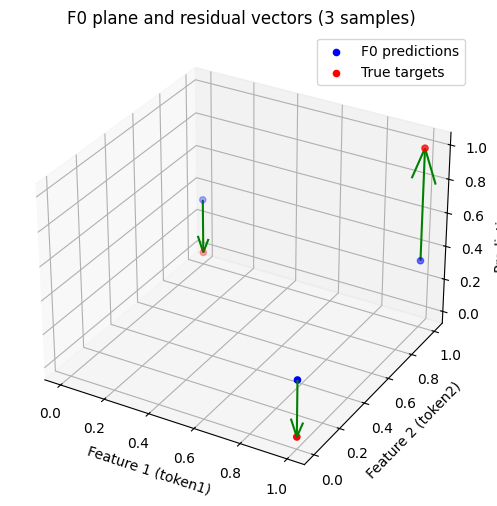

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. Sample data: 3 rows, 3 features (tokens) ---
X = np.array([
    [0, 1, 0],  # ham
    [1, 0, 0],  # ham
    [1, 1, 1]   # spam
])
y = np.array([0, 0, 1])

# --- 2. Initial prediction F0 (mean) ---
F0 = np.full(y.shape, np.mean(y))
residuals = y - F0

print("F0:", F0)
print("Residuals:", residuals)

# --- 3. Plot F0 plane and residuals ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Coordinates for features (just use first 3 features as axes)
xs = X[:,0]
ys = X[:,1]
zs = F0  # initial plane

# Plot F0 plane points
ax.scatter(xs, ys, zs, color='blue', label='F0 predictions')

# Plot true target points
ax.scatter(xs, ys, y, color='red', label='True targets')

# Draw residual vectors
for i in range(len(y)):
    ax.quiver(xs[i], ys[i], zs[i], 0, 0, residuals[i], color='green', arrow_length_ratio=0.3)

ax.set_xlabel("Feature 1 (token1)")
ax.set_ylabel("Feature 2 (token2)")
ax.set_zlabel("Prediction / F0")
ax.set_title("F0 plane and residual vectors (3 samples)")
ax.legend()
plt.show()


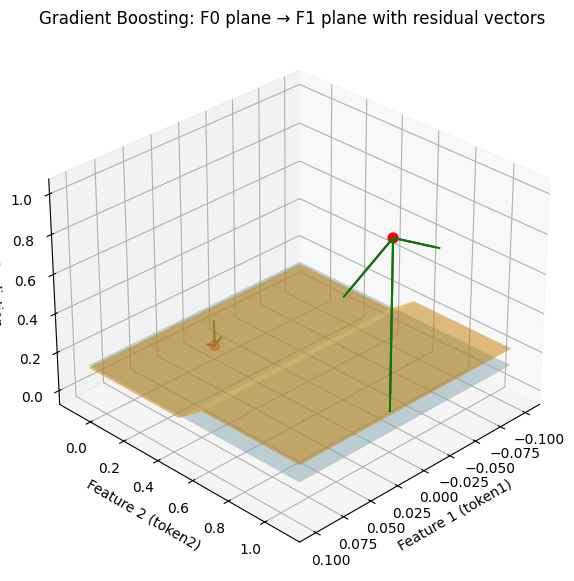

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor

# --- Sample 3 rows from your training set (2 ham, 1 spam) ---
# Convert X_train and y_train to numpy arrays before sampling
X_train_np = X_train
y_train_np = y_train.values

ham_indices = np.where(y_train_np == 0)[0][:2]
spam_indices = np.where(y_train_np == 1)[0][:1]
sample_indices = np.concatenate([ham_indices, spam_indices])

X_sample = X_train_np[sample_indices]
y_sample = y_train_np[sample_indices]

# --- Step 1: F0 initial prediction (mean of y_train) ---
F0_val = np.mean(y_train)

# Create a meshgrid in feature space (first 2 tokens)
x_range = np.linspace(np.min(X_sample[:,0])-0.1, np.max(X_sample[:,0])+0.1, 10)
y_range = np.linspace(np.min(X_sample[:,1])-0.1, np.max(X_sample[:,1])+0.1, 10)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
F0_plane = np.full_like(X_mesh, F0_val)  # Flat F0 plane

# --- Step 2: Fit first shallow tree to residuals ---
residuals = y_sample - F0_val
tree1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree1.fit(X_sample, residuals)
h1_sample = tree1.predict(X_sample)
eta = 0.1
F1_sample = F0_val + eta * h1_sample
residuals2 = y_sample - F1_sample

# For visualization, predict F1 across the meshgrid
mesh_points = np.c_[X_mesh.ravel(), Y_mesh.ravel()]
F1_plane = F0_val + eta * tree1.predict(mesh_points)
F1_plane = F1_plane.reshape(X_mesh.shape)

# --- 3D Visualization ---
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot F0 plane
ax.plot_surface(X_mesh, Y_mesh, F0_plane, color='lightblue', alpha=0.5, label='F0 plane')

# Plot F1 plane
ax.plot_surface(X_mesh, Y_mesh, F1_plane, color='orange', alpha=0.5, label='F1 plane')

# Plot true sample points
ax.scatter(X_sample[:,0], X_sample[:,1], y_sample, color='red', s=50, label='True labels')

# Plot residual vectors from F0 to targets
for i in range(len(y_sample)):
    ax.quiver(X_sample[i,0], X_sample[i,1], F0_val, 0, 0, residuals[i],
              color='green', arrow_length_ratio=0.2)

# Plot residual vectors from F1 to targets
for i in range(len(y_sample)):
    ax.quiver(X_sample[i,0], X_sample[i,1], F1_sample[i], 0, 0, residuals2[i],
              color='purple', arrow_length_ratio=0.2)

ax.set_xlabel("Feature 1 (token1)")
ax.set_ylabel("Feature 2 (token2)")
ax.set_zlabel("Prediction")
ax.set_title("Gradient Boosting: F0 plane → F1 plane with residual vectors")
ax.view_init(elev=30, azim=45)  # better 3D angle
plt.show()

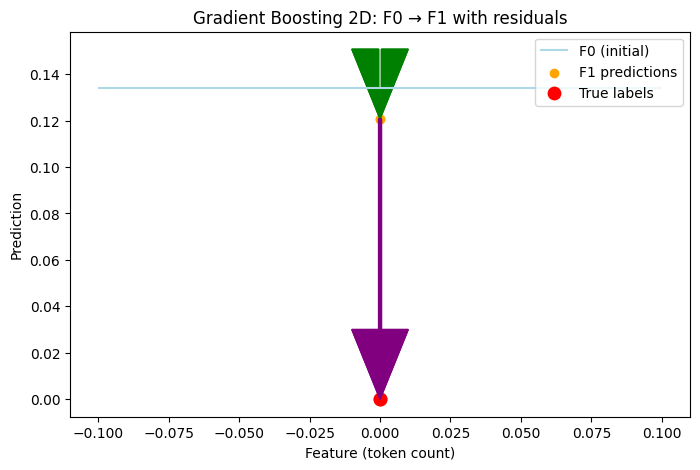

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# --- Sample 2 rows: 1 ham, 1 spam ---
ham_idx = np.where(y_train == 0)[0][0]
spam_idx = np.where(y_train == 1)[0][0]
X_sample = X_train[[ham_idx, spam_idx], 0].reshape(-1, 1)  # single feature
y_sample = y_train[[ham_idx, spam_idx]]

# Step 1: F0
F0_val = np.mean(y_train)
F0 = np.full_like(y_sample, F0_val, dtype=float)

# Step 2: Residuals
residuals = y_sample - F0

# Step 3: Fit first weak learner
tree1 = DecisionTreeRegressor(max_depth=1, random_state=42)
tree1.fit(X_sample, residuals)
h1 = tree1.predict(X_sample)
eta = 0.1
F1 = F0 + eta * h1
residuals2 = y_sample - F1

# --- Plot ---
plt.figure(figsize=(8,5))

# F0 line
plt.hlines(F0_val, xmin=np.min(X_sample)-0.1, xmax=np.max(X_sample)+0.1, colors='lightblue', label='F0 (initial)')

# F1 line (after first tree)
plt.scatter(X_sample, F1, color='orange', label='F1 predictions')
for i in range(len(y_sample)):
    plt.arrow(X_sample[i, 0], F0[i], 0, F1[i]-F0[i], color='green', head_width=0.02, length_includes_head=True)

# True labels
plt.scatter(X_sample, y_sample, color='red', s=80, label='True labels')

# Residuals after F1
for i in range(len(y_sample)):
    plt.arrow(X_sample[i, 0], F1[i], 0, residuals2[i], color='purple', head_width=0.02, length_includes_head=True)

plt.xlabel("Feature (token count)")
plt.ylabel("Prediction")
plt.title("Gradient Boosting 2D: F0 → F1 with residuals")
plt.legend()
plt.show()